In [1]:
from utils.ts_interpolation import TSIArgs # create_ds_dict, plot_ds
from experiments.ts_interpolation.tsi import tsi_experiment

args = TSIArgs()
args.n_epochs = 3
args.test_interval = 3
# args.remove_existing_data = True
# args.n_rxns = 8000

exp_log = tsi_experiment(args)

Starting training...
100%|██████████| 843/843 [00:24<00:00, 34.16it/s]
Epoch 1: Training Loss 0.4732860178246228
100%|██████████| 843/843 [00:24<00:00, 34.33it/s]
Epoch 2: Training Loss 0.47293313349602434
100%|██████████| 843/843 [00:26<00:00, 32.26it/s]
Epoch 3: Training Loss 0.47275381297238156
100%|██████████| 106/106 [00:02<00:00, 41.63it/s]
Epoch 3: Test Loss 0.4688822403440514
Best Test Loss 0.4688822403440514 on Epoch 3


In [27]:
exp_log.test_logs[-1].Ds[0]

array([[[0.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 0.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 0.       , ..., 1.       , 1.       ,
         1.       ],
        ...,
        [1.       , 1.       , 1.       , ..., 0.       , 0.6899745,
         0.6899745],
        [1.       , 1.       , 1.       , ..., 0.6899745, 0.       ,
         0.6899745],
        [1.       , 1.       , 1.       , ..., 0.6899745, 0.6899745,
         0.       ]],

       [[0.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 0.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 0.       , ..., 1.       , 1.       ,
         1.       ],
        ...,
        [1.       , 1.       , 1.       , ..., 0.       , 0.6899745,
         0.6899745],
        [1.       , 1.       , 1.       , ..., 0.6899745, 0.       ,
   

In [19]:
ttt = []
for batched_Ds in exp_log.test_logs[-1].Ds:
    ttt.extend(batched_Ds)

ttt[1]

array([[0.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       ],
       [1.       , 0.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       ],
       [1.       , 1.       , 0.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       , 0.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       ],
       [1.       , 1.       , 1.       , 1.       , 0.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.     

In [15]:
import numpy as np
# batched_D_gt = [x[-1] for x in torch.split(batched_D_gt, 1, 0)]
ttt = [x[-1] for batched_Ds in exp_log.test_logs[-1].Ds for x in np.split(batched_Ds, 1, 0)]
t = []
for batch in ttt:
    t.extend(batch)
len(ttt), len(t)

16
14
17
21
17
17
15
18
17
15
21
19
14
18
16
18
17
19
17
16
19
17
16
15
15
15
16
17
19
18
16
19
17
17
17
15
17
18
17
16
17
16
16
16
16
19
18
18
17
19
15
15
17
16
19
16
18
17
17
15
15
14
19
18
17
16
16
19
19
17
16
16
17
16
17
16
15
15
15
17
15
16
16
15
19
16
18
16
16
15
16
15
16
17
19
15
16
17
17
17
19
16
17
17
17
10


(106, 1768)

In [ ]:
D_gts = []
for idx, rxn_batch in enumerate(test_loader):
    X_gt, mask = to_dense_batch(rxn_batch.pos_ts, rxn_batch.x_ts_batch, 0., max(rxn_batch.num_atoms)) # pos_ts = [b * max_num_nodes, 3]
    batched_D_gt = X_to_dist(X_gt)
    batched_D_gt = [x[-1] for x in torch.split(batched_D_gt, 1, 0)]
    D_gts.extend(batched_D_gt)

In [6]:
np.concatenate(exp_log.test_logs[-1].Ds, 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16 and the array at index 1 has size 14

In [2]:
import numpy as np

def save_Ds(exp_log, file_name, save_to_log_dir = False, D_folder='experiments/ts_interpolation/ds/'):
    test_Ds = np.concatenate(exp_log.test_logs[-1].Ds, 0)[0:842] # final test log, new dim = num_rxns x 21 x 21
    assert len(test_Ds) == 842, f"Should have 842 test_Ds when unbatched, you have {len(test_Ds)}."
    np.save(D_folder + file_name, test_Ds)
    if save_to_log_dir:
        np.save(exp_log.args.log_dir + 'D', test_Ds)

file_name = 'testtttt.npy'
save_Ds(exp_log, file_name, save_to_log_dir=False)
exp_log.plot_loss(save_fig = False)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16 and the array at index 1 has size 14

In [ ]:
def save_Ws(exp_log, file_name, save_to_log_dir = False, W_folder='experiments/ts_interpolation/ws/'):
    test_Ws = np.concatenate(exp_log.test_logs[-1].Ws, 0)[0:842].squeeze() # final test log, and remove singleton dims; new dim = num_rxns x 21 x 21
    assert len(test_Ws) == 842, f"Should have 842 test_Ws when unbatched, you have {len(test_Ws)}."
    np.save(W_folder + file_name, test_Ws)
    if save_to_log_dir:
        np.save(exp_log.args.log_dir + 'W', test_Ws)

save_Ws(exp_log, file_name, False)

# Old

In [3]:
from experiments.building_on_mit.emb_space.emb_space import run_tsi_experiment, display_embeddings, display_train_and_test_embs
from torch_geometric.utils import to_dense_batch
import matplotlib.pyplot as plt
from ts_vae.utils import remove_files

# if want to run name == main in notebook, cell with just following line
# %run -i experiments/building_on_mit/emb_space
remove_files()

Files removed.


Starting TS interpolation experiment...
===== Testing epoch: 005, Loss: 5.6845 =====
===== Testing epoch: 010, Loss: 4.5238 =====
Completed experiment, use the experiment log to print results.


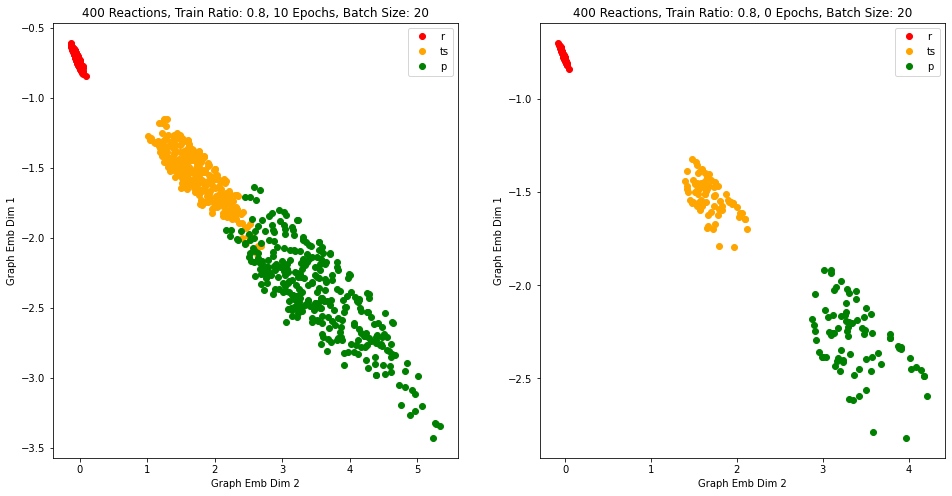

In [3]:
### keep for initial test
exp_log, test_log = run_tsi_experiment(train_ratio = 0.8, batch_size = 20, epochs = 10, test_interval = 5)
display_train_and_test_embs(exp_log, test_log)

# fig, ax = plt.subplots(figsize = (8, 8))
# e_fig, e_ax = display_embeddings(exp_log, fig, ax)
# t_fig, t_ax = display_embeddings(test_log)
plt.savefig(f'experiments/building_on_mit/emb_space/figs/traintest.png')

Starting TS interpolation experiment...
===== Testing epoch: 010, Loss: 0.9889 =====
===== Testing epoch: 020, Loss: 0.6449 =====
Completed experiment, use the experiment log to print results.
Starting TS interpolation experiment...
===== Testing epoch: 010, Loss: 1.0115 =====
===== Testing epoch: 020, Loss: 0.7245 =====
Completed experiment, use the experiment log to print results.


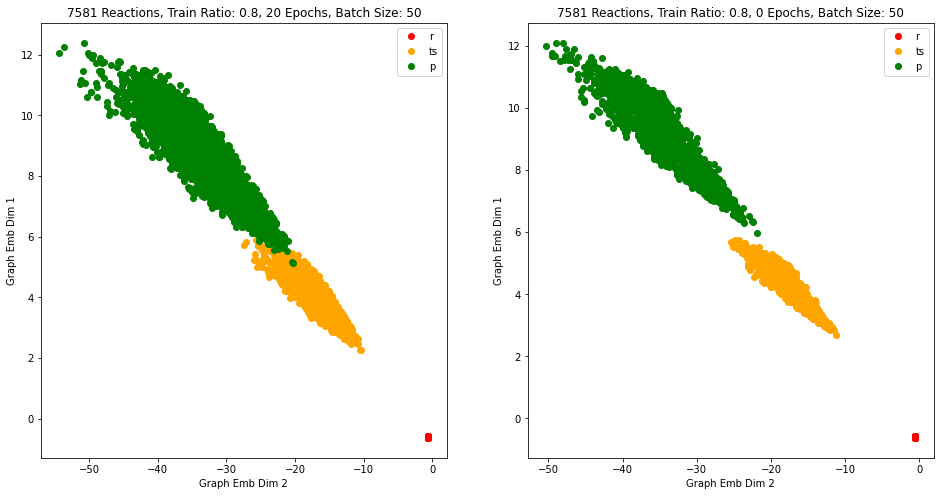

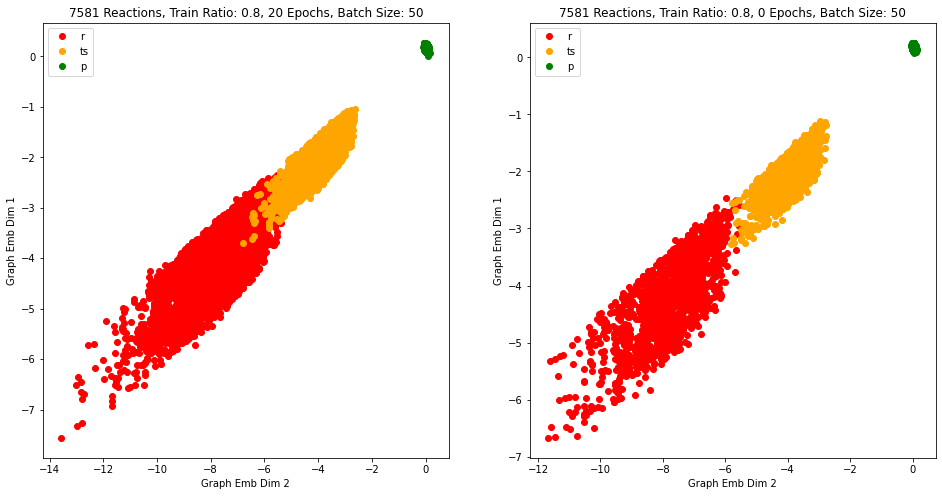

In [5]:
# modifying batch sizes
# exp_params = [(0.8, 50, 20), (0.8, 100, 20), (0.8, 150, 20)], took 30 mins! longer for bigger batches weirdly

exp_params = [(0.8, 50, 20), (0.8, 50, 20)]

for i, (t_ratio, b_size, epochs) in enumerate(exp_params):
    train_log, test_log = run_tsi_experiment(t_ratio, b_size, epochs)
    fig, axs = display_train_and_test_embs(train_log, test_log)
    file_name = f"tr{t_ratio}_bs{b_size}_e{epochs}"
    plt.savefig(f'experiments/building_on_mit/emb_space/figs/traintest2/{i}.png')

In [1]:
from experiments.building_on_mit.ts_interpolation.tsi import tsi_main, display_train_and_test_embs
from ts_vae.utils import remove_files
import matplotlib.pyplot as plt

remove_files()
# all data, tt=0.8, b=20, e=10, ti=5, time = 280s

Files removed.


In [2]:
train_log, test_log = tsi_main(tt_split = 0.8, batch_size = 20, epochs = 10, test_interval = 5, train_on_ts = True)

  0%|          | 0/6739 [00:00<?, ?it/s]

Processing...


100%|██████████| 842/842 [00:00<00:00, 1334.69it/s]


Done!
Starting TS interpolation experiment...
===== Training epoch 001 complete with loss: 3.6808 ====
===== Training epoch 002 complete with loss: 1.5158 ====
===== Training epoch 003 complete with loss: 0.8931 ====
===== Training epoch 004 complete with loss: 0.7089 ====
===== Training epoch 005 complete with loss: 0.5492 ====
===== Testing epoch 005 complete with loss: 0.5846 ====
===== Training epoch 006 complete with loss: 0.5425 ====
===== Training epoch 007 complete with loss: 0.5473 ====
===== Training epoch 008 complete with loss: 0.5392 ====
===== Training epoch 009 complete with loss: 0.5042 ====
===== Training epoch 010 complete with loss: 0.2510 ====
===== Testing epoch 010 complete with loss: 0.1713 ====
Completed experiment, use the experiment log to print results.


(<Figure size 1152x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'[Train] 7581 Reactions, Train Ratio: 0.8, 10 Epochs, Batch Size: 20'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>,
        <AxesSubplot:title={'center':'[Test] 7581 Reactions, Train Ratio: 0.8, 2 Epochs, Batch Size: 20'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>],
       dtype=object))

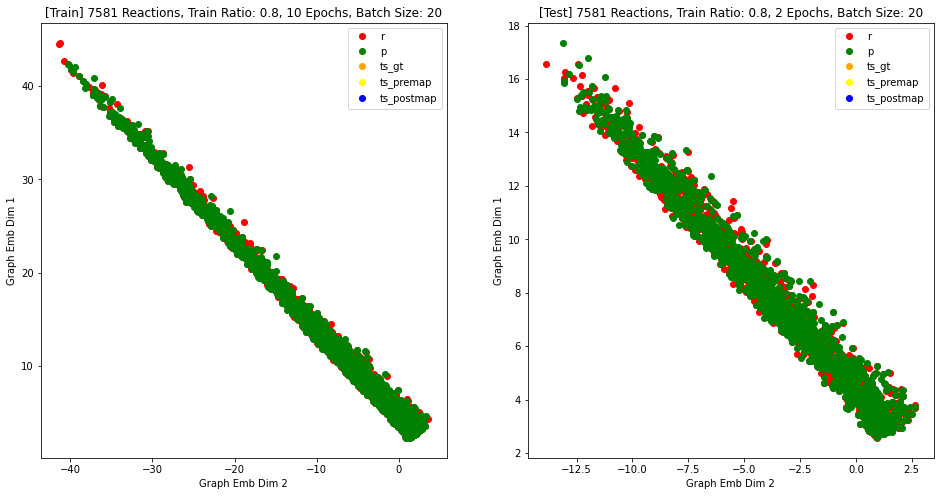

In [5]:
which_to_print = {'r': True, 'p': True, 'ts_gt': False, 'ts_premap': False, 'ts_postmap': False}
display_train_and_test_embs(train_log, test_log, which_to_print)
# plt.savefig(f'experiments/building_on_mit/emb_space/figs/full/new.png')

In [2]:
train_log, test_log = tsi_main(tt_split = 0.8, batch_size = 40, epochs = 10, test_interval = 5, train_on_ts = False)

Starting TS interpolation experiment...
===== Training epoch 001 complete with loss: 7.9404 ====
===== Training epoch 002 complete with loss: 5.2525 ====
===== Training epoch 003 complete with loss: 2.4375 ====
===== Training epoch 004 complete with loss: 1.9681 ====
===== Training epoch 005 complete with loss: 1.7098 ====
===== Testing epoch 005 complete with loss: 1.5903 ====
===== Training epoch 006 complete with loss: 1.4693 ====
===== Training epoch 007 complete with loss: 1.2498 ====
===== Training epoch 008 complete with loss: 1.0484 ====
===== Training epoch 009 complete with loss: 0.8905 ====
===== Training epoch 010 complete with loss: 0.8145 ====
===== Testing epoch 010 complete with loss: 0.7507 ====
Completed experiment, use the experiment log to print results.


(<Figure size 1152x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'[Train] 7581 Reactions, Train Ratio: 0.8, 10 Epochs, Batch Size: 40'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>,
        <AxesSubplot:title={'center':'[Test] 7581 Reactions, Train Ratio: 0.8, 2 Epochs, Batch Size: 40'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>],
       dtype=object))

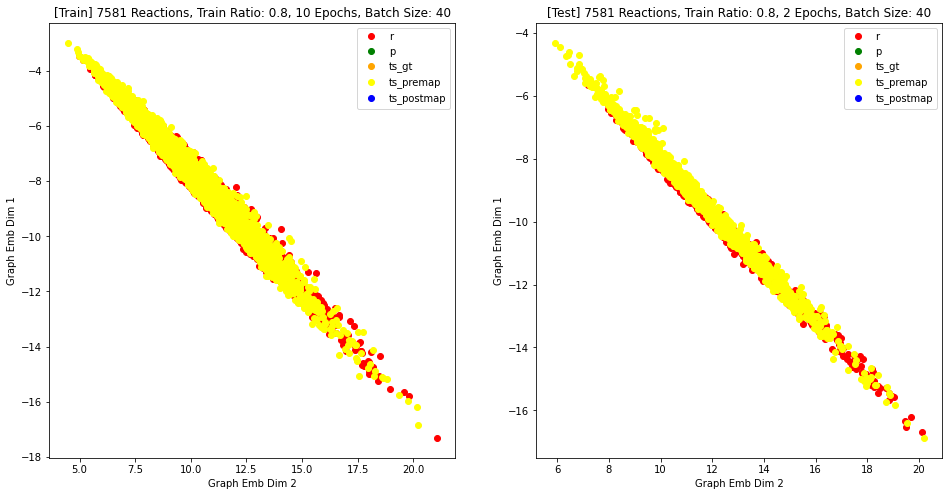

In [5]:
which_to_print = {'r': True, 'p': False, 'ts_gt': False, 'ts_premap': True, 'ts_postmap': False}
display_train_and_test_embs(train_log, test_log, which_to_print)
# plt.savefig(f'experiments/building_on_mit/emb_space/figs/full/all.png')

### Experiment Tracking with W&B

- config: store hp and metadata for each run
- wandb.init
- wandb.watch: log model gradients and params over time (helps detect bugs e.g. weird grad behaviour)
- wandb.log: log stuff we care about
- wandb.save: save online

use with block in context manager syntax

Convert MLP to GNN by swapping torch.nn.Linear with PyG's GNN operators e.g. GCN layer
Lucky's work
- PairFeatures: a manual MP I think. it has to be otherwise what he's doing isn't a GNN.
- set edges: iterate: 
    - compute features (i.e. MP) -> MLP(features) -> update edges
    - compute features (i.e. MP) -> MLP(MLP(edges)) -> update vertices

Loose notes
- Can define data class for parameters e.g. 
    - @dataclass
      class GNNParams:
        input_dim: int
        output_dim: int
        ... (hidden_sizes, dropout, batchnorm, activation)